#### Project : Model Tuning 
###### Objective : 
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score

###### DataSet Description: 

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

Variable Information on CSV file:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength -- quantitative -- MPa -- Output Variable 

Data source: https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/


https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-ssetty3.git



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline


In [2]:
df_concrete = pd.read_csv('concrete.csv')
df_concrete.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

##### Data Columns description : 
Input parameters :

1. Cement (component 1) -- unit --  kg in a m3 mixture 
2. Blast Furnace Slag (component 2) -- unit -- kg in a m3 mixture 
3. Fly Ash (component 3) -- unit --  kg in a m3 mixture 
4. Water (component 4) -- unit --  kg in a m3 mixture 
5. Superplasticizer (component 5)  -- unit --  kg in a m3 mixture 
6. Coarse Aggregate (component 6)  -- unit --  kg in a m3 mixture 
7. Fine Aggregate (component 7)  -- unit -- kg in a m3 mixture 
8. Age  -- unit -- Day (1~365) 

output Parameter:
9. Concrete compressive strength -- Unit -- MPa 

In [3]:
# check missing values
print ('The missing values are >>> \n', df_concrete.isnull().sum())

The missing values are >>> 
 cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


In [4]:
# Describe the data and check missing values
print('The data Distribution >>>>  \n', df_concrete.describe(),"\n ---------------- ")

The data Distribution >>>>  
             cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330

In [5]:
# pandas_profiling 
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df_concrete, title="Cement Pandas Profiling Report")
profile.to_file("Cement Pandas Profiling Report.html")

In [7]:
profile

In [8]:
print('The shape of < concrete > given data set is >> ', df_concrete.shape)

The shape of < concrete > given data set is >>  (1030, 9)


#### Observation:
1. As per the problem statement this looks as clear case of liner regression type of a problem, were with given experiment set has 8 influencing variables ( Cement, Slag, ash, water Super plastic, coarseagg,fineagg,age) for 1 output variable ( Strenght).
2. There are no missing values on the data set.
3. With respect to profiling report, duplicate rows, very clearly illustrates that trial considerations are influencing the strength ( comparison on columns -- cement , age & sterngth )

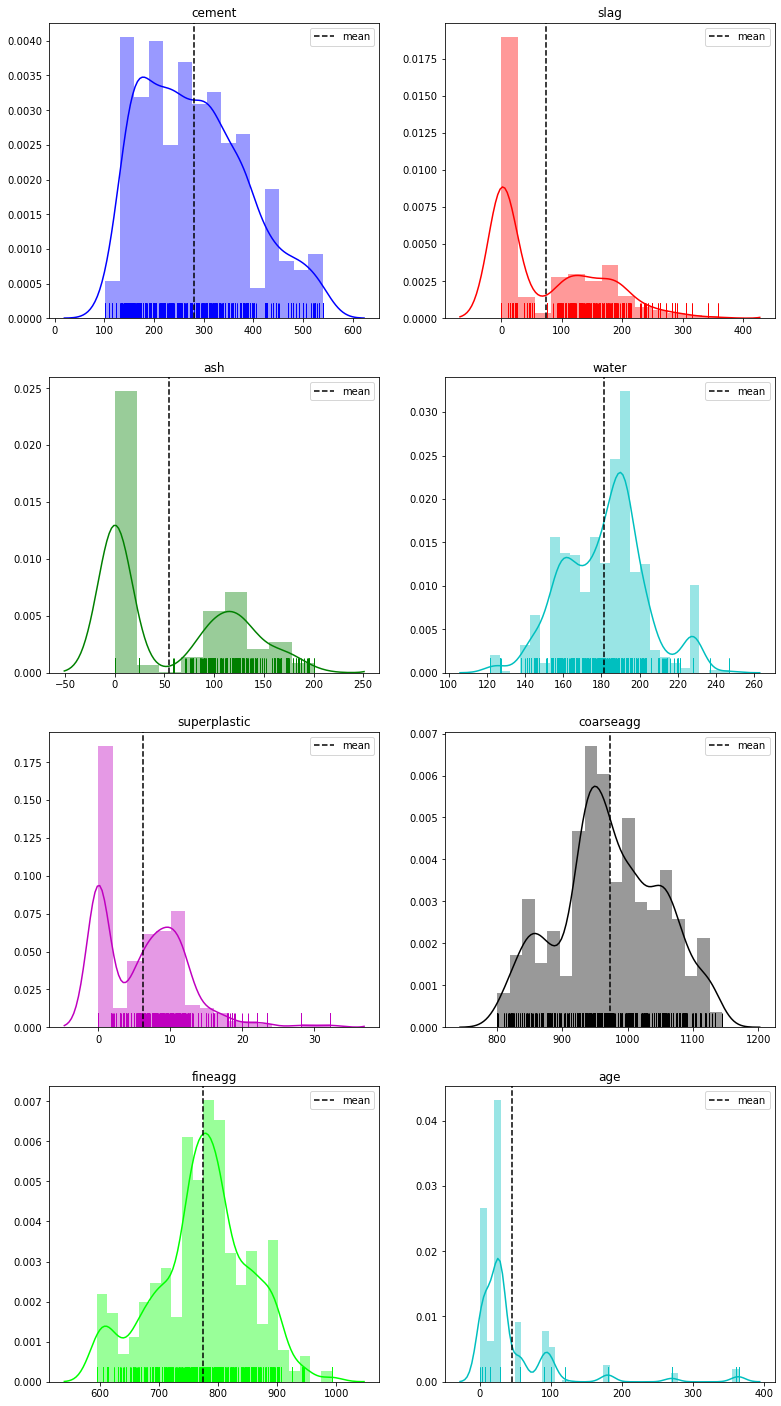

In [9]:
# Univariate Analysis 
cols = [i for i in df_concrete.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df_concrete[i],color=k,rug=True)
    # ax.set_facecolor("w")
    plt.axvline(df_concrete[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,)
    plt.xlabel("")

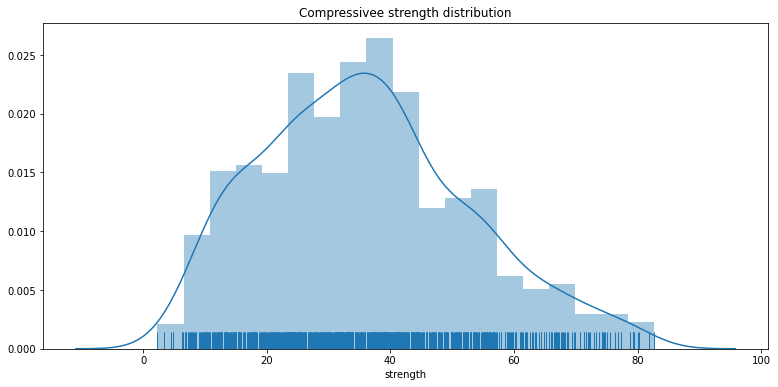

In [10]:
plt.figure(figsize=(13,6))
sns.distplot(df_concrete["strength"],rug=True)
plt.title("Compressivee strength distribution")
plt.show()

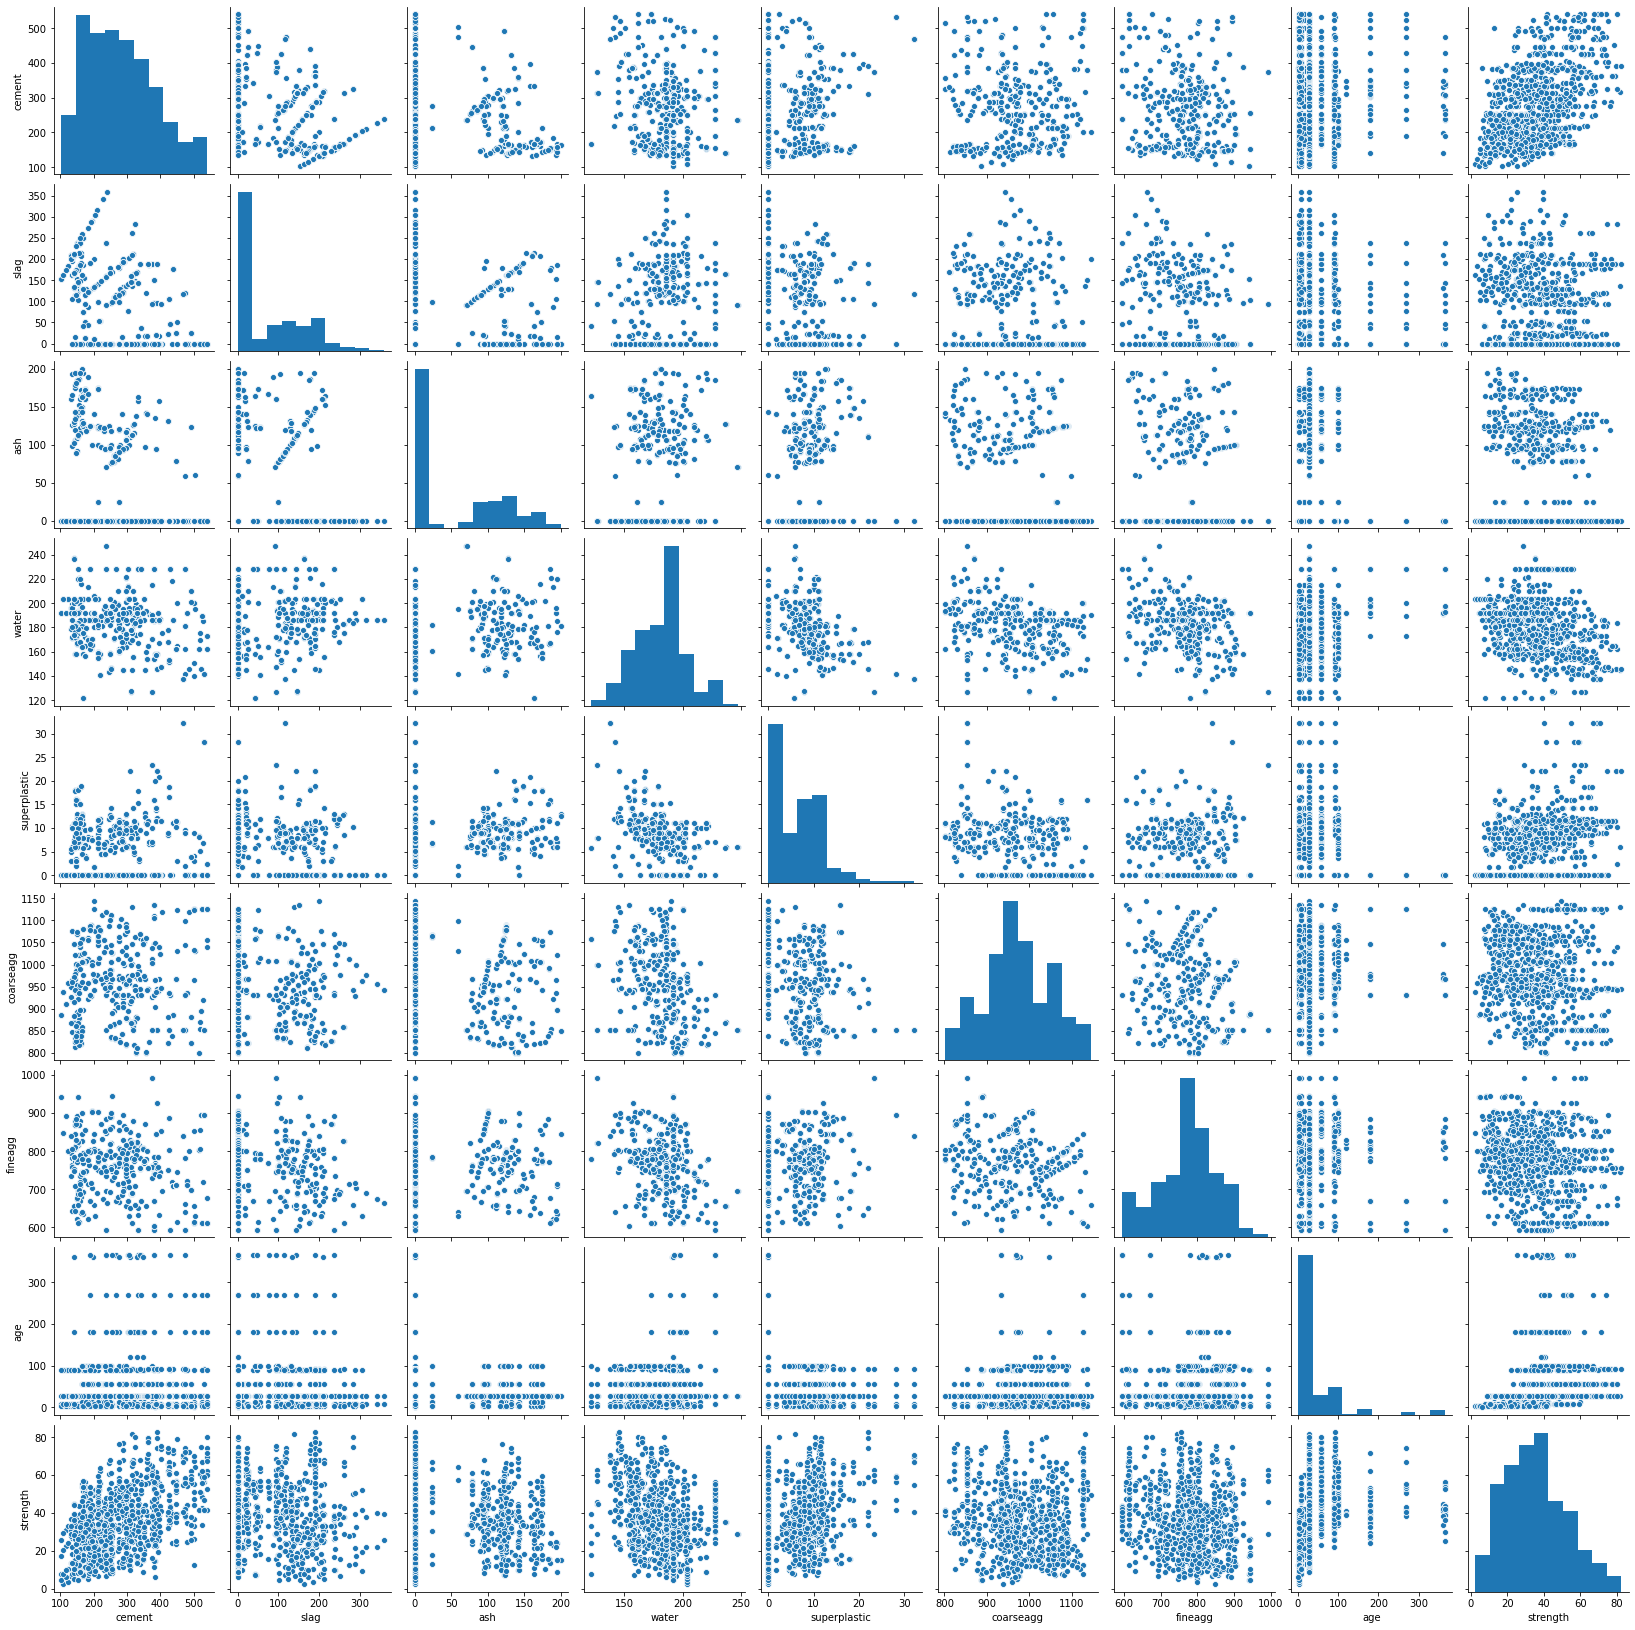

In [11]:
# Bivariate Analysis 
sns.pairplot(df_concrete)
plt.show()

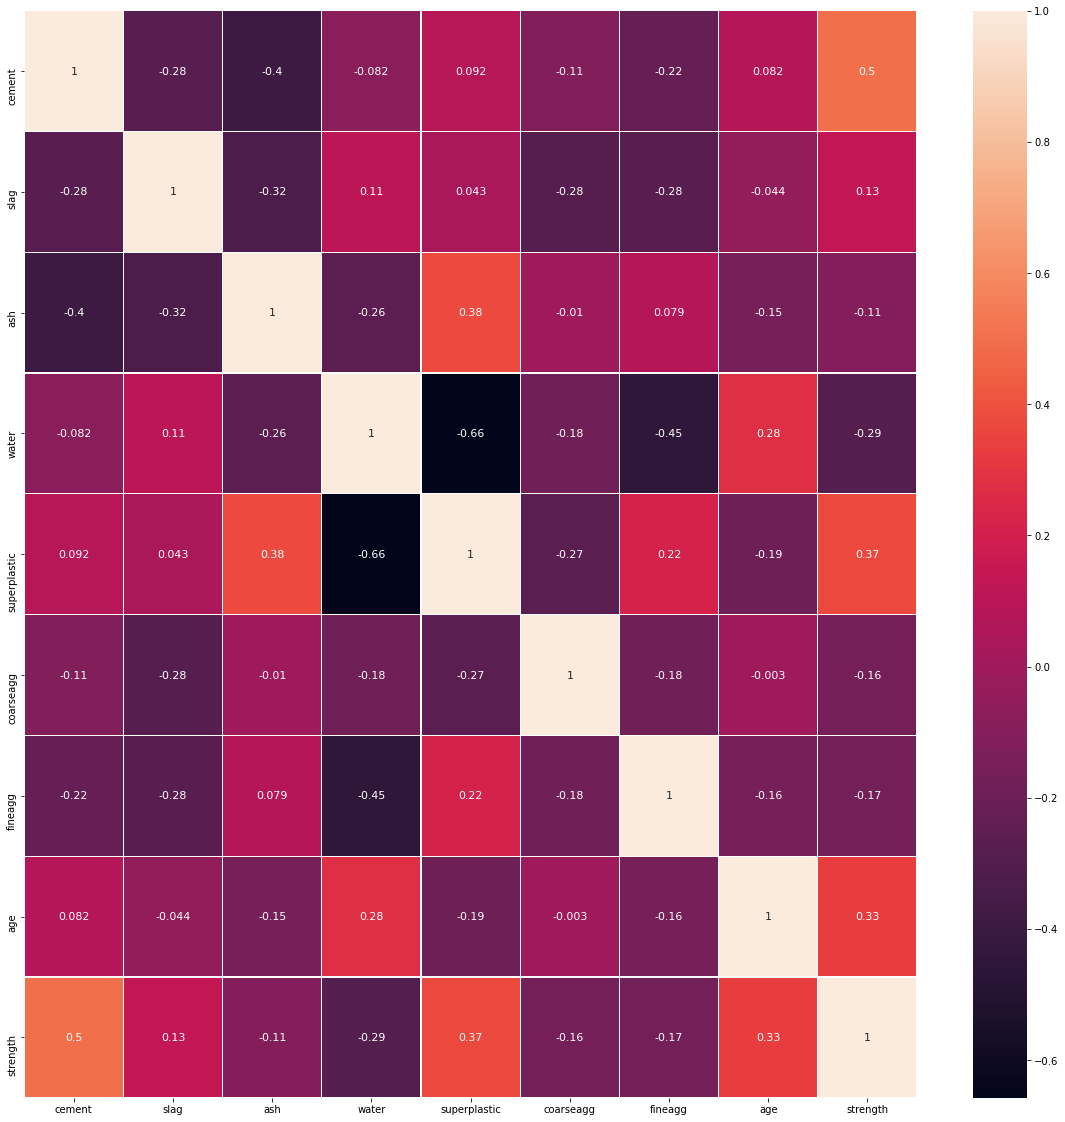

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(df_concrete.corr(), annot=True,linewidths=0.2,annot_kws={'size':11})

Observation : From the above co-relation matix the Strength has strong co-relation between
1. cement - ash
2. slag - superplastic
3. superplastic -ash
4. age - water

And same influnce is studied below via scatter plot.

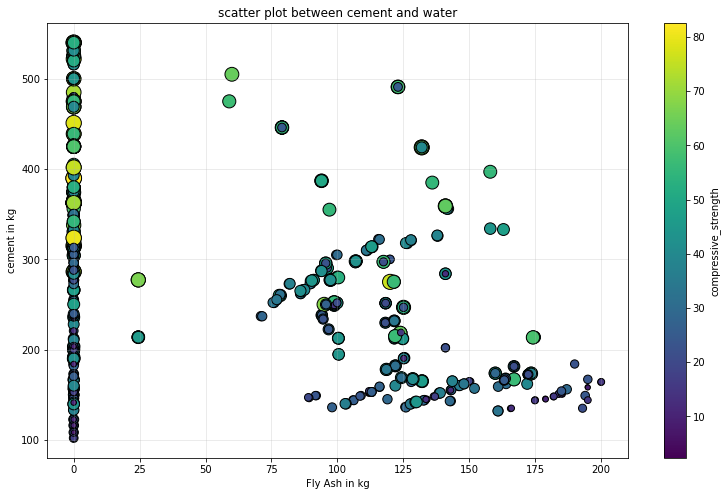

In [13]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df_concrete["ash"],df_concrete["cement"],
            c=df_concrete["strength"],s=df_concrete["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("Fly Ash in kg")
ax.set_ylabel("cement in kg")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

Observation : To achive higher compressive strenght, better results are obtained with less fly and on model limit ash to 125kg.

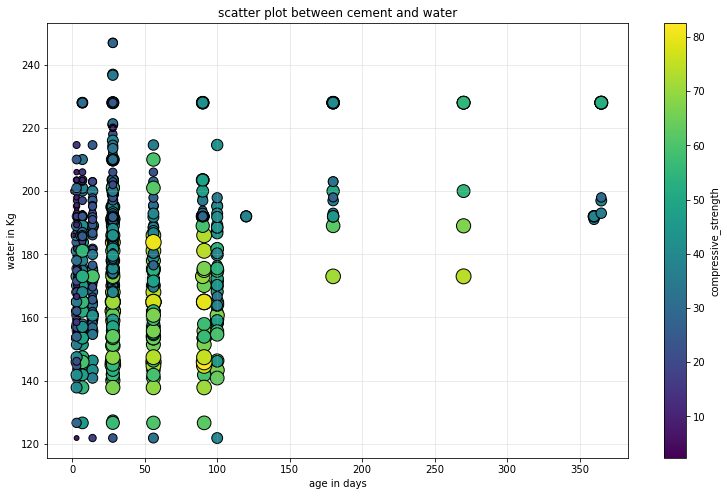

In [14]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df_concrete["age"],df_concrete["water"],
            c=df_concrete["strength"],s=df_concrete["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("age in days")
ax.set_ylabel("water in Kg")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

Observation: Better Compressive strenght are obtained with water less than 200 kg with curing time of 200 days on samples.

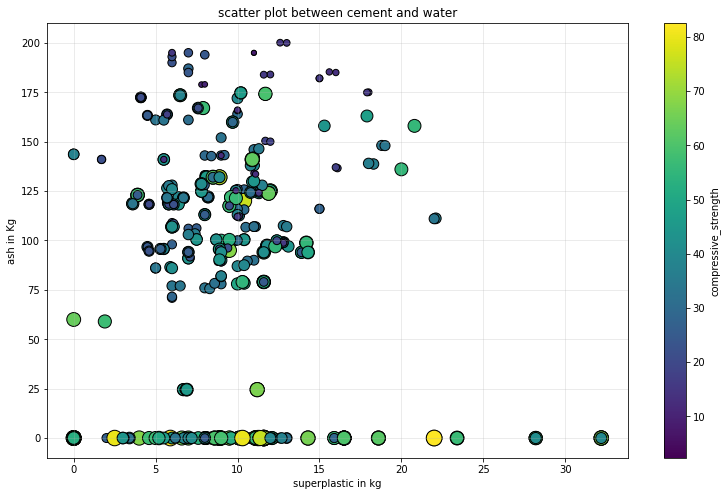

In [15]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df_concrete["superplastic"],df_concrete["ash"],
            c=df_concrete["strength"],s=df_concrete["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("superplastic in kg")
ax.set_ylabel("ash in Kg")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

Observation : The strength higher ash less than 125 kg and 25 kg of superplastic 

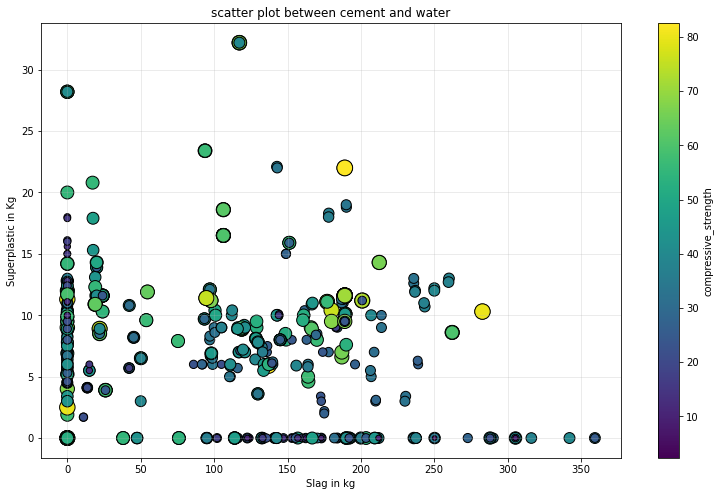

In [16]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df_concrete["slag"],df_concrete["superplastic"],
            c=df_concrete["strength"],s=df_concrete["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("Slag in kg")
ax.set_ylabel("Superplastic in Kg")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

Observation : The strength higher slag less than 300 kg and 25 kg of superplastic 

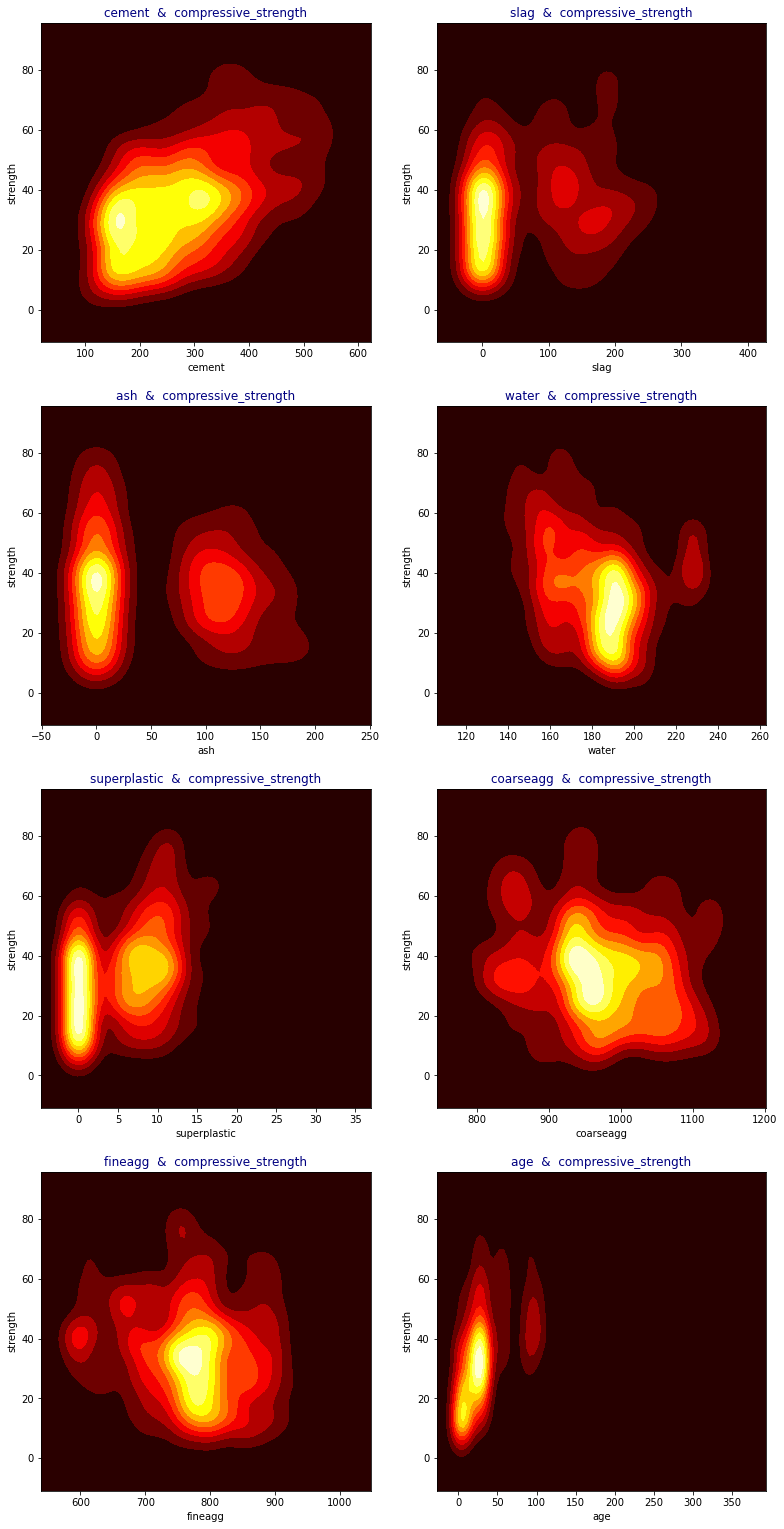

In [17]:
cols = [i for i in df_concrete.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(df_concrete[i],
                df_concrete["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  compressive_strength",color="navy")


#### Feature Engineering
The List of Techniques, comments that would be tried ,
1. Imputation - No missing values
2. Handling Outliers - Trying useing to limit age variable to 200 days.
3. Binning -X
4. Log Transform - with referance to strength distplot, the dependent data (Strength) is evenly distrubuted. 
5. One-Hot Encoding -X
6. Grouping Operations -X
7. Feature Split -Try to reduce the data based on age outliners.
8. Scaling - tried to scale the complete dataframe.
9. Extracting Date- X


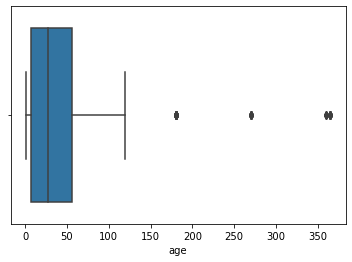

In [18]:
#Objective is to achive max ~ 200 days base on the age v/s water graph and co- relation map.
sns.boxplot(df_concrete['age'])

In [19]:
from scipy.stats import zscore

df_concrete[['age']].mean()

df_concrete['age_outliers'] = df_concrete['age']
df_concrete['age_outliers']= zscore(df_concrete['age_outliers'])

condition1 = (df_concrete['age_outliers']>3.5) | (df_concrete['age_outliers']<-3.0 )
df_concrete1 = df_concrete.drop(df_concrete[condition1].index, axis = 0, inplace = False)

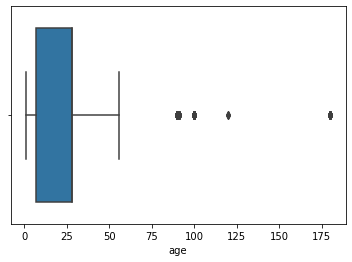

In [20]:
df_concrete2 = df_concrete1.drop('age_outliers', axis=1)
sns.boxplot(df_concrete2['age'])

In [21]:
print('The shape of the data frame original Rows*Columns is = ', df_concrete.shape , "\n--------------------------------------") 
print('The shape of the data frame after setting boundary to 200 days Rows*Columns is = ', df_concrete2.shape , "\n--------------------------------------") 

The shape of the data frame original Rows*Columns is =  (1030, 10) 
--------------------------------------
The shape of the data frame after setting boundary to 200 days Rows*Columns is =  (997, 9) 
--------------------------------------


In [22]:
#Here useing going to use StandardScaler to scale data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
df_concrete3= scaler.fit_transform(df_concrete2)
df_sconcrete = pd.DataFrame(df_concrete3)
df_sconcrete.columns=['cement','slag','ash','water','superplastic','coarseagg',
                          'fineagg','age','strength']


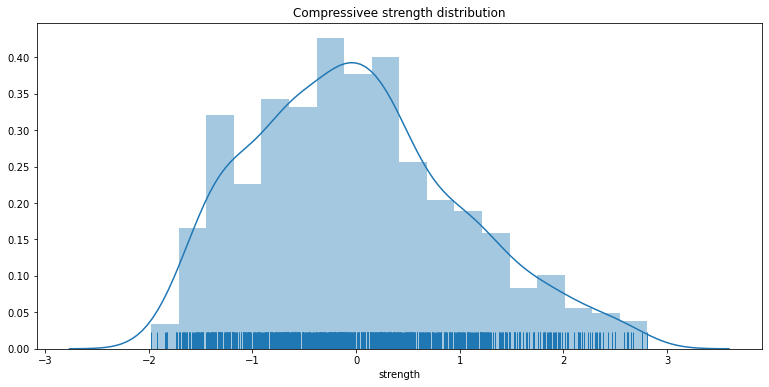

In [23]:
plt.figure(figsize=(13,6))
sns.distplot(df_sconcrete["strength"],rug=True)
plt.title("Compressivee strength distribution")
plt.show()

Obsetvation: Based on the current data model , we can chose simple train and test data split

#### Creating the model

In [24]:
# Data Split
# independant variables
X = df_concrete.drop(['strength'], axis=1)   ##  haveing errors.
# the dependent variable
y = df_concrete[['strength']]

In [25]:
# Spliting X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X, y, test_size=0.30, random_state=1) ## haveing errors.
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [26]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
train_X = feature_scaler.fit_transform(train_X)
test_X = feature_scaler.transform(test_X)

In [27]:
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

In [28]:
print('X variable shapes',"\n", train_X.shape)
print(test_X.shape,"\n-----------------")

print('Y Variable shapes',"\n",train_Y.shape)
print(test_Y.shape)

X variable shapes 
 (721, 9)
(309, 9) 
-----------------
Y Variable shapes 
 (721, 1)
(309, 1)


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

target = "strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("********************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_X,train_Y,test_X,test_Y,"coef")

print("************************","\n")
print("Trainig accuracy",lr.score(train_X,train_Y),"\n")  
print("Testing accuracy",lr.score(test_X, test_Y),"\n***********************")

LinearRegression()
********************************
CROSS VALIDATION SCORE
************************
cv-mean : -112.14799863830042
cv-std  : 27.04452047500057
cv-max  : -67.12418585555656
cv-min  : -189.7081834703681
************************ 

Trainig accuracy 0.6031487540630229 

Testing accuracy 0.6339136715208273 
***********************


In [31]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,train_X,train_Y,test_X,test_Y,"feat")

print("************************","\n")
print("Trainig accuracy",adb.score( train_X, train_Y),"\n")  
print("Testing accuracy",adb.score( test_X, test_Y ),"\n***********************")

AdaBoostRegressor()
********************************


F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:7

CROSS VALIDATION SCORE
************************
cv-mean : -56.94395533809457
cv-std  : 14.488597632280428
cv-max  : -30.413188108301306
cv-min  : -88.04232740895311
************************ 

Trainig accuracy 0.8208940269358447 

Testing accuracy 0.7684515884418658 
***********************


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,train_X,train_Y,test_X,test_Y,"feat")

print("************************","\n")
print("Trainig accuracy",adb.score( train_X,train_Y),"\n")  
print("Testing accuracy",adb.score( test_X, test_Y),"\n***********************")

GradientBoostingRegressor()
********************************


F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\conda\lib\site-packages\sklearn\utils\validation.py:7

CROSS VALIDATION SCORE
************************
cv-mean : -27.60482730047579
cv-std  : 10.457468943893103
cv-max  : -12.248882750425665
cv-min  : -53.27179000048913
************************ 

Trainig accuracy 0.8208940269358447 

Testing accuracy 0.7684515884418658 
***********************


F:\conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,train_X,train_Y,test_X,test_Y,"feat")
print("************************","\n")
print("Trainig accuracy",rf.score ( train_X,train_Y ),"\n")  
print( "Testing accuracy",rf.score( test_X, test_Y),"\n***********************")

RandomForestRegressor()
********************************


<ipython-input-29-d09e99aac04a>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algorithm.fit(dtrainx,dtrainy)
F:\conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  e

CROSS VALIDATION SCORE
************************
cv-mean : -26.27184823190195
cv-std  : 9.905508819965302
cv-max  : -12.993944777147115
cv-min  : -49.87926796994027
************************ 

Trainig accuracy 0.9826805452910596 

Testing accuracy 0.9047800590550518 
***********************


#### Tuning the model to Performance

In [34]:
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
import lightgbm as lgb
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from time import time
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn import svm, datasets


In [36]:
# RandomSearch forest better fit model.
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [38]:
rf = RandomForestClassifier(random_state = 1)
parameters = {'n_estimators': [100,125,150,175,200,225,250], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10], 
              'max_features': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'class_weight': [0.2,0.4,0.6,0.8,1.0],               
              'min_samples_split': [2,3,4,5,6,7]}
                                  
clf_rf = GridSearchCV(rf, param_grid = parameters, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit (train_X,train_Y)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 10500 candidates, totalling 52500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4492 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 12492 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 23692 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 38092 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 52500 out of 52500 | elapsed:  1.2min finished
F:\conda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


ValueError: Unknown label type: 'continuous'

In [41]:
## Not sure why model fit is haveing error, exploring this error.
## Approaching with a breakdown to fit a model.

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [42]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=train_X, y=train_Y, cv=5)

F:\conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\conda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\conda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\conda\lib\site-packages\sklearn\ensemble\_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "F:\conda\lib\site-packages\sklearn\ensemble\_forest.py", line 558, in _validate_y_class_weight
    check_classification_targets(y)
  File "F:\conda\lib\site-packages\sklearn\utils\mu

In [43]:
print(all_accuracies.mean())

nan


###### Not sure why the model is failling.
